In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

from numpy import sqrt
import warnings
import itertools

import statsmodels.api as sm
from matplotlib import pyplot

In [109]:
df = pd.read_excel("E:/Userfiles/Download/CocaCola_Sales_Rawdata.xlsx")

In [110]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# Visualization

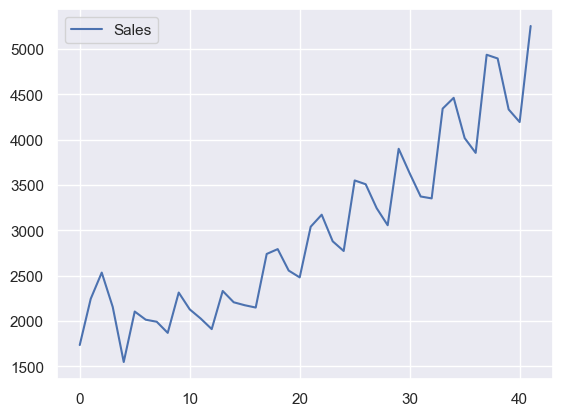

In [82]:
df.plot()
pyplot.show()

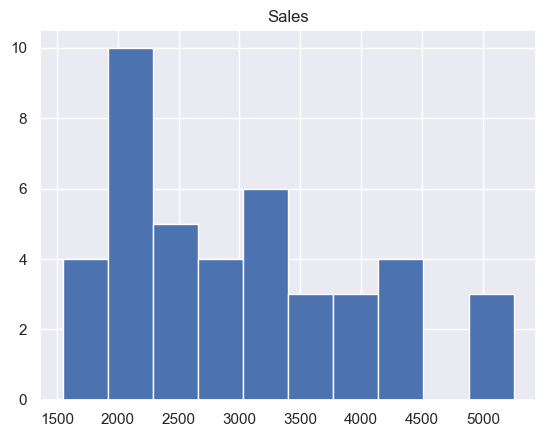

In [83]:
df.hist()
pyplot.show()

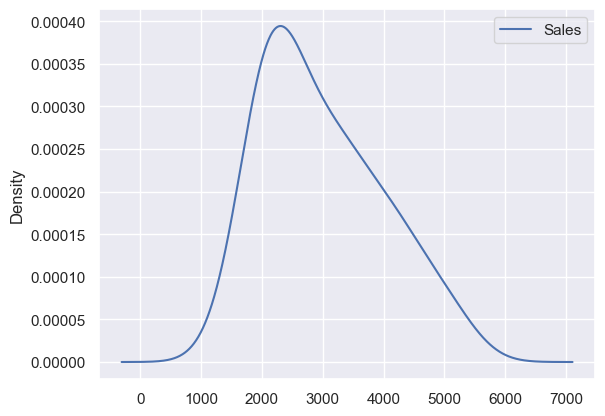

In [84]:
df.plot(kind='kde')
pyplot.show()

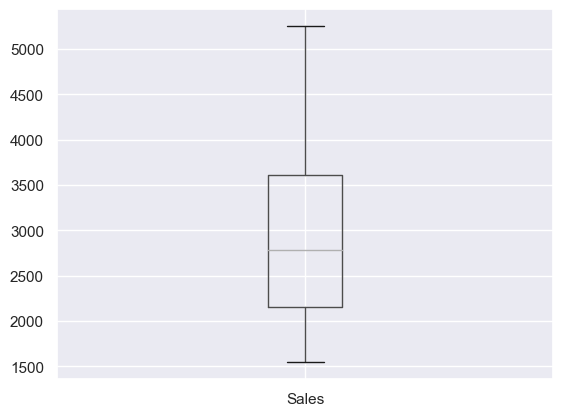

In [85]:
df.boxplot()
pyplot.show()

In [86]:
np.array(df["Sales"])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

C:\Users\Priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


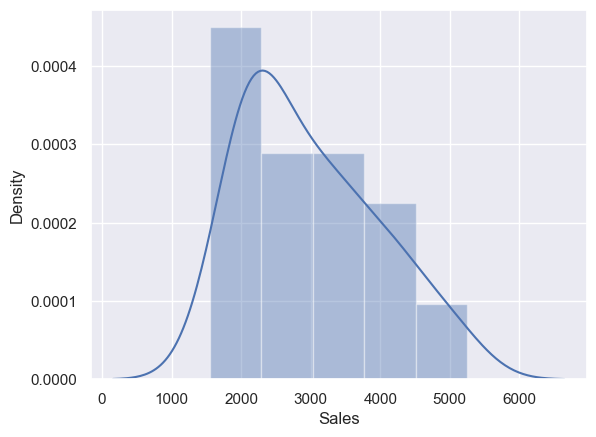

In [87]:
sns.set_theme()
rk= sns.distplot(df['Sales'],kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

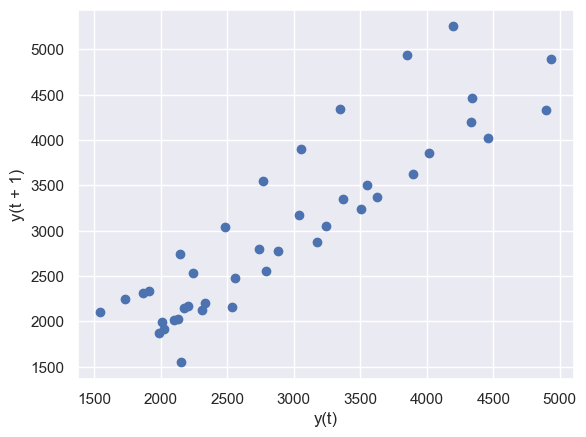

In [88]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])

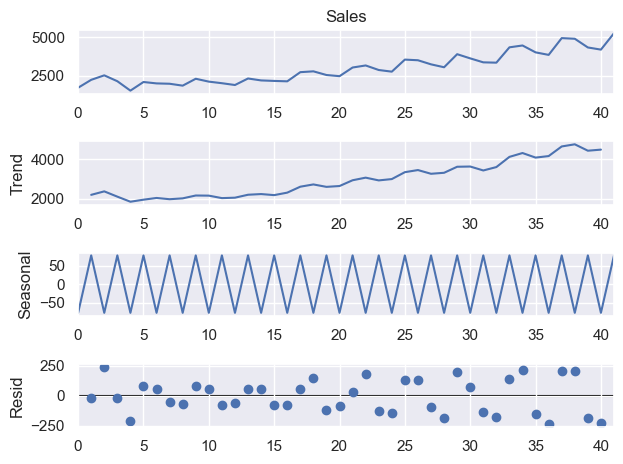

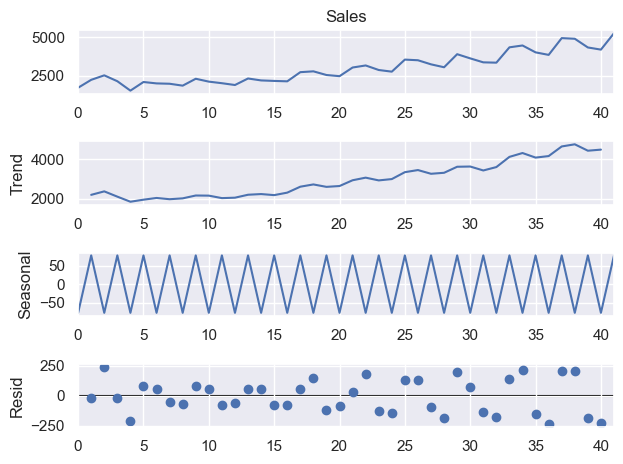

In [89]:
result = seasonal_decompose(df['Sales'], period=2)
result.plot()

# Data Preprocessing

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [91]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [92]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [93]:
len(df)

42

In [111]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [140]:
df['quarter'] = 0
for i in range(42):
    p=df['Quarter'][i]
    df['quarter'][i]=p[0:2]

C:\Users\Priya\AppData\Local\Temp\ipykernel_7780\1036792352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][i]=p[0:2]


In [141]:
df

,Quarter,Sales,t,t_squared,Sales_log,quarter
0,Q1_86,1734.827000,1,1,7.458663,Q1
1,Q2_86,2244.960999,2,4,7.716443,Q2
2,Q3_86,2533.804993,3,9,7.837477,Q3
3,Q4_86,2154.962997,4,16,7.675529,Q4
4,Q1_87,1547.818996,5,25,7.344602,Q1
5,Q2_87,2104.411995,6,36,7.651791,Q2
6,Q3_87,2014.362999,7,49,7.608058,Q3
7,Q4_87,1991.746998,8,64,7.596767,Q4
8,Q1_88,1869.049999,9,81,7.533186,Q1
9,Q2_88,2313.631996,10,100,7.746574,Q2


In [142]:
df['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [143]:
df_dummies=pd.DataFrame(pd.get_dummies(df['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([df,df_dummies],axis= 1)

In [144]:
cc

,Quarter,Sales,t,t_squared,Sales_log,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,1,7.458663,Q1,1,0,0,0
1,Q2_86,2244.960999,2,4,7.716443,Q2,0,1,0,0
2,Q3_86,2533.804993,3,9,7.837477,Q3,0,0,1,0
3,Q4_86,2154.962997,4,16,7.675529,Q4,0,0,0,1
4,Q1_87,1547.818996,5,25,7.344602,Q1,1,0,0,0
5,Q2_87,2104.411995,6,36,7.651791,Q2,0,1,0,0
6,Q3_87,2014.362999,7,49,7.608058,Q3,0,0,1,0
7,Q4_87,1991.746998,8,64,7.596767,Q4,0,0,0,1
8,Q1_88,1869.049999,9,81,7.533186,Q1,1,0,0,0
9,Q2_88,2313.631996,10,100,7.746574,Q2,0,1,0,0


In [145]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(df['Sales'])

In [146]:
cc

,Quarter,Sales,t,t_squared,Sales_log,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,1,7.458663,Q1,1,0,0,0
1,Q2_86,2244.960999,2,4,7.716443,Q2,0,1,0,0
2,Q3_86,2533.804993,3,9,7.837477,Q3,0,0,1,0
3,Q4_86,2154.962997,4,16,7.675529,Q4,0,0,0,1
4,Q1_87,1547.818996,5,25,7.344602,Q1,1,0,0,0
5,Q2_87,2104.411995,6,36,7.651791,Q2,0,1,0,0
6,Q3_87,2014.362999,7,49,7.608058,Q3,0,0,1,0
7,Q4_87,1991.746998,8,64,7.596767,Q4,0,0,0,1
8,Q1_88,1869.049999,9,81,7.533186,Q1,1,0,0,0
9,Q2_88,2313.631996,10,100,7.746574,Q2,0,1,0,0


In [147]:
train =cc.head(35)
test =cc.tail(7)

In [148]:
from sklearn.metrics import mean_squared_error

In [149]:
import statsmodels.formula.api as smf
# Linear Model
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

636.5072930351146

In [150]:
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

511.81173194173283

In [151]:
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4515.811064811282

In [152]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,511.811732
0,rmse_linear,636.507293
1,rmse_exp,4515.811065


# ARIMA

In [153]:
df1 = pd.read_excel("E:/Userfiles/Download/CocaCola_Sales_Rawdata.xlsx", header=0,index_col=0, parse_dates=True)


In [154]:
df1

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [131]:
split_point = len(df1) - 7
dataset, validation = df1[0:split_point], df1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 35, Validation 7


In [132]:
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

In [133]:
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

C:\Users\Priya\AppData\Local\Temp\ipykernel_7780\3813225160.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


In [134]:
train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [135]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [136]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


In [178]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
2,rmse_quad,511.811732
0,rmse_linear,636.507293
1,rmse_exp,4515.811065
